<a href="https://colab.research.google.com/github/praveenpareek11/loan_status/blob/master/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [0]:
'''Classifiers'''
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [0]:
'''Metrics/Evaluation'''
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix

In [0]:
data = pd.read_csv("/content/drive/My Drive/Assignment/Loan_prediction/data_set.csv")

In [0]:
data_original = data.copy()

In [0]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [0]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [0]:
print('dataing data shape: ', data.shape)
data.head()

dataing data shape:  (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
data["Loan_Status"].count()

614

In [0]:
data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [0]:
# Normalize can be set to True to print proportions instead of number 
data["Loan_Status"].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

In [0]:
plt.figure(figsize=(20,5))

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

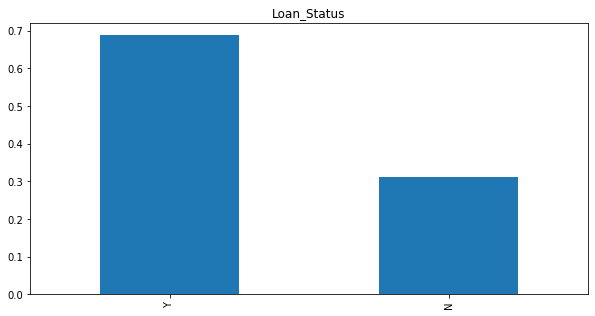

In [0]:
data["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status', figsize=(10,5))

In [0]:
data["Gender"].count()

601

In [0]:
data["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [0]:
data['Gender'].value_counts(normalize=True)*100

Male      81.364393
Female    18.635607
Name: Gender, dtype: float64

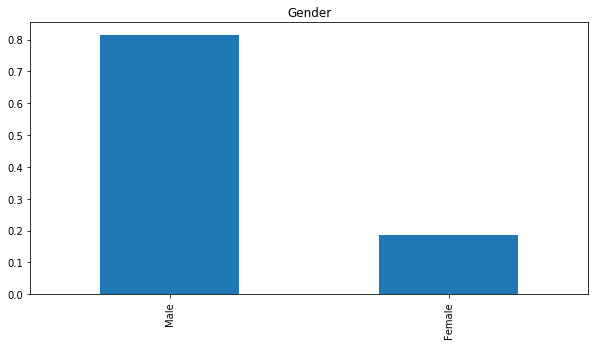

In [0]:
data['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender', figsize=(10,5))

In [0]:
data["Married"].count()

611

In [0]:
data["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [0]:
data['Married'].value_counts(normalize=True)*100

Yes    65.139116
No     34.860884
Name: Married, dtype: float64

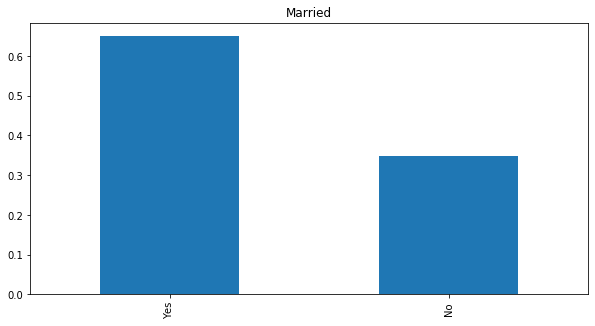

In [0]:
data['Married'].value_counts(normalize=True).plot.bar(title= 'Married', figsize=(10,5))

In [0]:
data["Self_Employed"].count()

582

In [0]:
data["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [0]:
data['Self_Employed'].value_counts(normalize=True)*100

No     85.910653
Yes    14.089347
Name: Self_Employed, dtype: float64

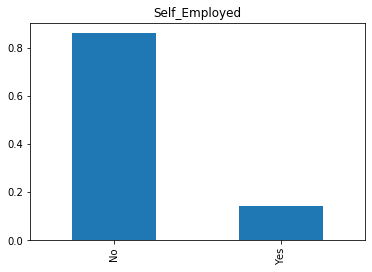

In [0]:
data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

In [0]:
data["Credit_History"].count()

564

In [0]:
data["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [0]:
data['Credit_History'].value_counts(normalize=True)*100

1.0    84.219858
0.0    15.780142
Name: Credit_History, dtype: float64

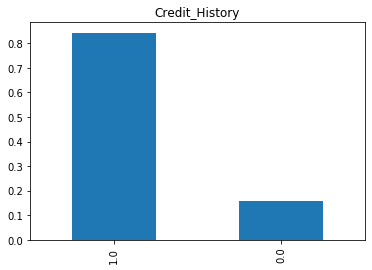

In [0]:
data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

In [0]:
data['Dependents'].count()

599

In [0]:
data["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [0]:
data['Dependents'].value_counts(normalize=True)*100

0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: Dependents, dtype: float64

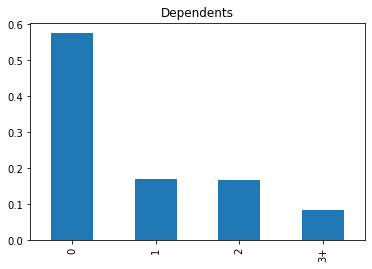

In [0]:
data['Dependents'].value_counts(normalize=True).plot.bar(title="Dependents")

In [0]:
data["Education"].count()

614

In [0]:
data["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [0]:
data["Education"].value_counts(normalize=True)*100

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

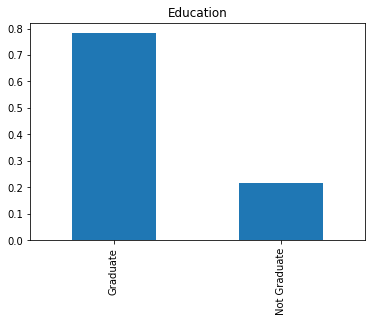

In [0]:
data["Education"].value_counts(normalize=True).plot.bar(title = "Education")

In [0]:
data["Property_Area"].count()

614

In [0]:
data["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [0]:
data["Property_Area"].value_counts(normalize=True)*100

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64

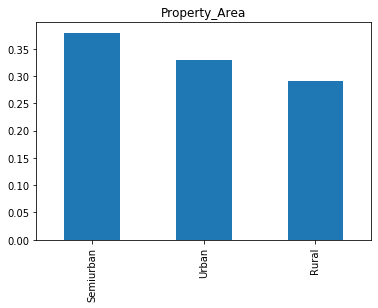

In [0]:
data["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area")

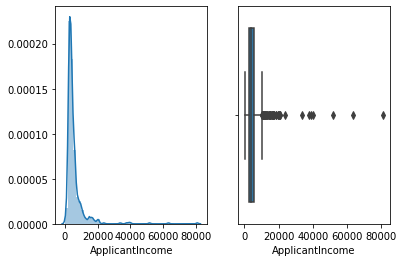

In [0]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data["ApplicantIncome"]);

plt.subplot(122)
sns.boxplot(data['ApplicantIncome'])
plt.show()

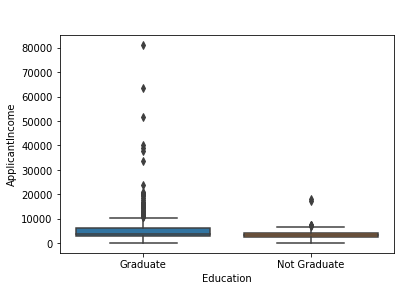

In [0]:
sns.boxplot(data=data, y='ApplicantIncome',x="Education")
plt.suptitle(" ")
plt.show()

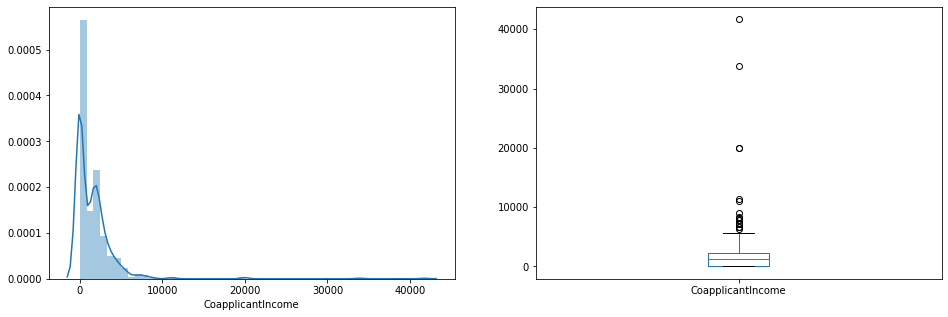

In [0]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data["CoapplicantIncome"]);

plt.subplot(122)
data["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

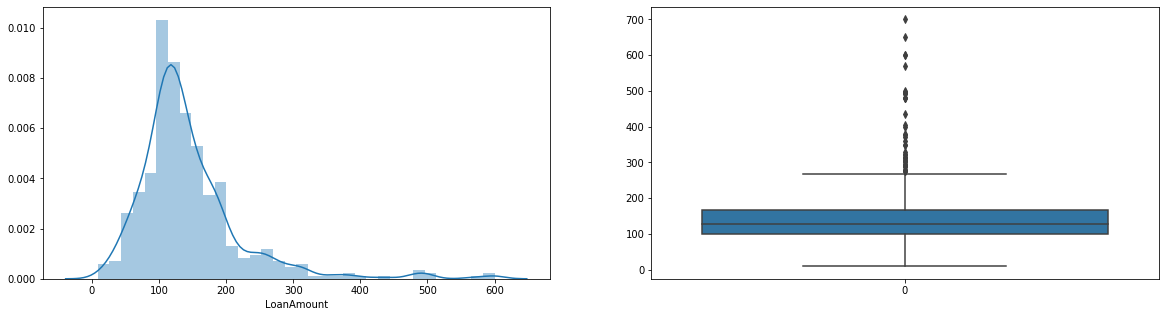

In [0]:
plt.figure(figsize=(20,5))
plt.figure(1)
plt.subplot(121)
df=data.dropna()
sns.distplot(df['LoanAmount'])

plt.subplot(122)
sns.boxplot(data=data['LoanAmount'])

plt.show()

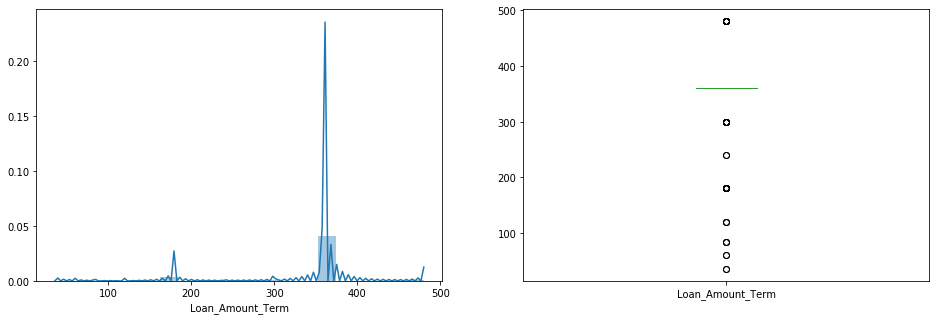

In [0]:
plt.figure(1)
plt.subplot(121)
df = data.dropna()
sns.distplot(df["Loan_Amount_Term"]);

plt.subplot(122)
df["Loan_Amount_Term"].plot.box(figsize=(16,5))
plt.show()

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


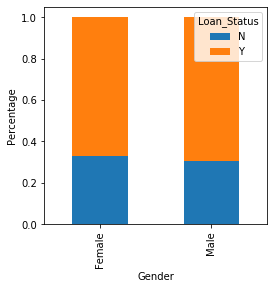

In [0]:
print(pd.crosstab(data["Gender"],data["Loan_Status"]))
Gender = pd.crosstab(data["Gender"],data["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


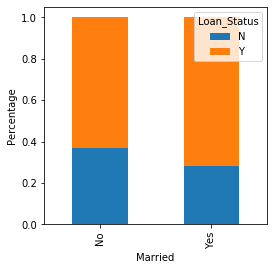

In [0]:
print(pd.crosstab(data["Married"],data["Loan_Status"]))
Married=pd.crosstab(data["Married"],data["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


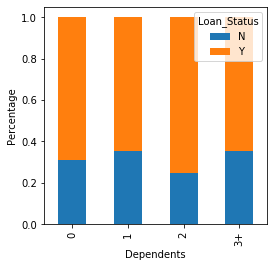

In [0]:
print(pd.crosstab(data['Dependents'],data["Loan_Status"]))
Dependents = pd.crosstab(data['Dependents'],data["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Dependents")
plt.ylabel("Percentage")
plt.show()

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


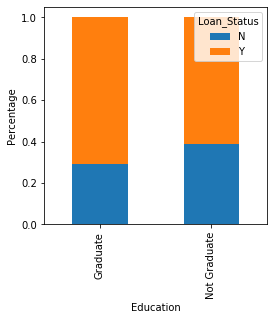

In [0]:
print(pd.crosstab(data["Education"],data["Loan_Status"]))
Education = pd.crosstab(data["Education"],data["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.show()

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


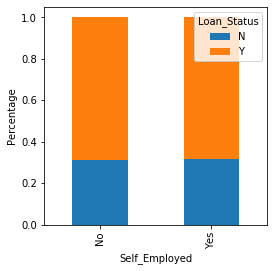

In [0]:
print(pd.crosstab(data["Self_Employed"],data["Loan_Status"]))
SelfEmployed = pd.crosstab(data["Self_Employed"],data["Loan_Status"])
SelfEmployed.div(SelfEmployed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Self_Employed")
plt.ylabel("Percentage")
plt.show()

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


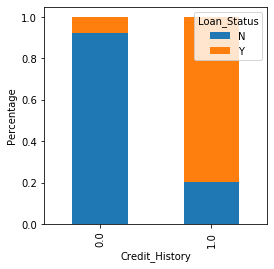

In [0]:
print(pd.crosstab(data["Credit_History"],data["Loan_Status"]))
CreditHistory = pd.crosstab(data["Credit_History"],data["Loan_Status"])
CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Credit_History")
plt.ylabel("Percentage")
plt.show()

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


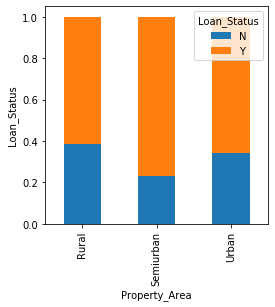

In [0]:
print(pd.crosstab(data["Property_Area"],data["Loan_Status"]))
PropertyArea = pd.crosstab(data["Property_Area"],data["Loan_Status"])
PropertyArea.div(PropertyArea.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Property_Area")
plt.ylabel("Loan_Status")
plt.show()

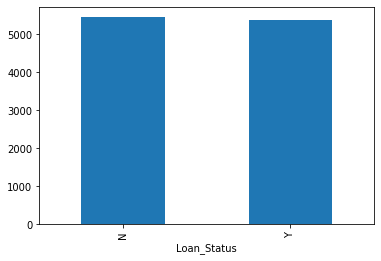

In [0]:
data.groupby("Loan_Status")['ApplicantIncome'].mean().plot.bar()

In [0]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
data['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

Loan_Status   N    Y
Income_bin          
Low          26   57
Average      51  123
High         32   79
Very high    39   73


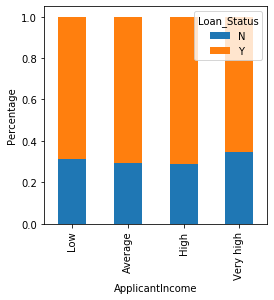

In [0]:
print(pd.crosstab(data["Income_bin"],data["Loan_Status"]))
Income_bin = pd.crosstab(data["Income_bin"],data["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

In [0]:
bins=[0,1000,3000,42000]
group =['Low','Average','High']
data['CoapplicantIncome_bin']=pd.cut(df["CoapplicantIncome"],bins,labels=group)

Loan_Status             N    Y
CoapplicantIncome_bin         
Low                     3   15
Average                46  123
High                   24   53


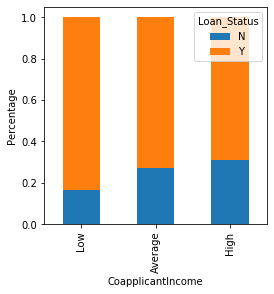

In [0]:
print(pd.crosstab(data["CoapplicantIncome_bin"],data["Loan_Status"]))
CoapplicantIncome_Bin = pd.crosstab(data["CoapplicantIncome_bin"],data["Loan_Status"])
CoapplicantIncome_Bin.div(CoapplicantIncome_Bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")
plt.show()

In [0]:
data["TotalIncome"]=data["ApplicantIncome"]+data["CoapplicantIncome"]

In [0]:
bins =[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
data["TotalIncome_bin"]=pd.cut(data["TotalIncome"],bins,labels=group)

Loan_Status       N    Y
TotalIncome_bin         
Low              14   10
Average          32   87
High             65  159
Very High        81  166


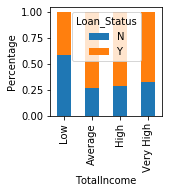

In [0]:
print(pd.crosstab(data["TotalIncome_bin"],data["Loan_Status"]))
TotalIncome = pd.crosstab(data["TotalIncome_bin"],data["Loan_Status"])
TotalIncome.div(TotalIncome.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(2,2))
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.show()

In [0]:
bins = [0,100,200,700]
group=['Low','Average','High']
data["LoanAmount_bin"]=pd.cut(df["LoanAmount"],bins,labels=group)

Loan_Status      N    Y
LoanAmount_bin         
Low             38   86
Average         83  207
High            27   39


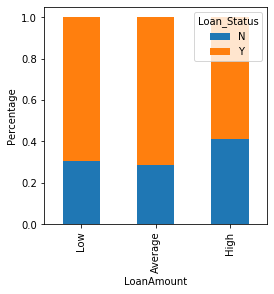

In [0]:
print(pd.crosstab(data["LoanAmount_bin"],data["Loan_Status"]))
LoanAmount=pd.crosstab(data["LoanAmount_bin"],data["Loan_Status"])
LoanAmount.div(LoanAmount.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("LoanAmount")
plt.ylabel("Percentage")
plt.show()

In [0]:
data=data.drop(["Income_bin","CoapplicantIncome_bin","LoanAmount_bin","TotalIncome","TotalIncome_bin"],axis=1)

In [0]:
#data['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)
#test['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)
data['Dependents'].replace('3+',3,inplace=True)
data['Loan_Status'].replace('N', 0,inplace=True)
data['Loan_Status'].replace('Y', 1,inplace=True)

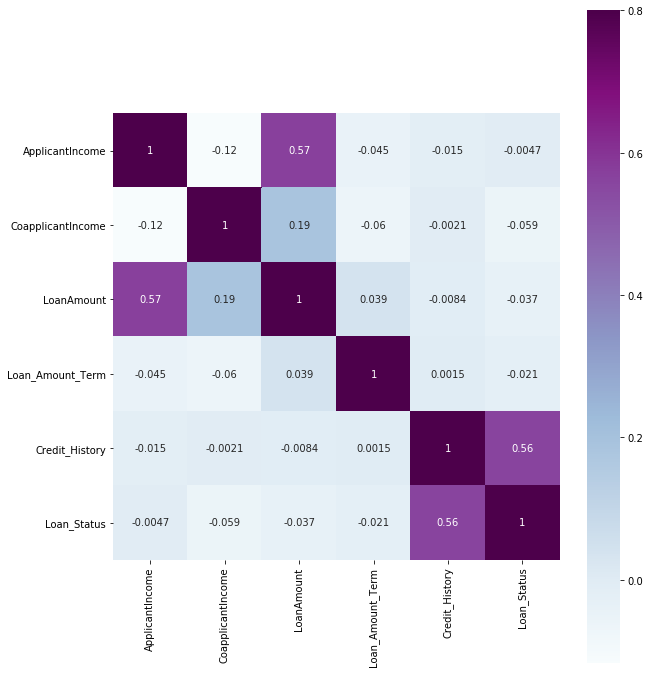

In [0]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);

In [0]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
data["Gender"].fillna(data["Gender"].mode()[0],inplace=True)
data["Married"].fillna(data["Married"].mode()[0],inplace=True)
data['Dependents'].fillna(data["Dependents"].mode()[0],inplace=True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0],inplace=True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0],inplace=True)

In [0]:
data["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [0]:
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0],inplace=True)

In [0]:
data["Loan_Amount_Term"].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [0]:
data["LoanAmount"].fillna(data["LoanAmount"].median(),inplace=True)

In [0]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

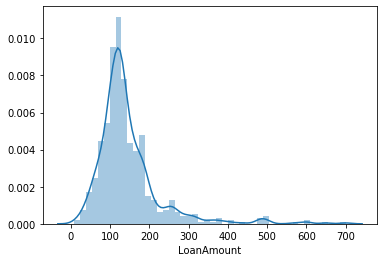

In [0]:
sns.distplot(data["LoanAmount"]);

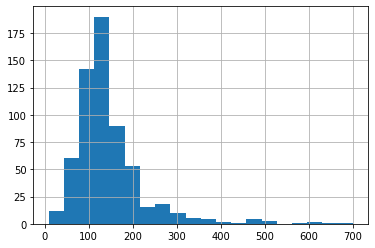

In [0]:
data['LoanAmount'].hist(bins=20)

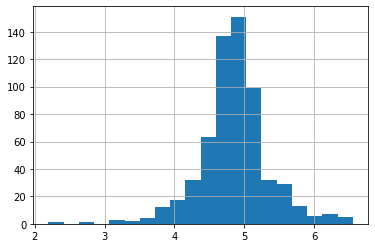

In [0]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])
data['LoanAmount_log'].hist(bins=20)

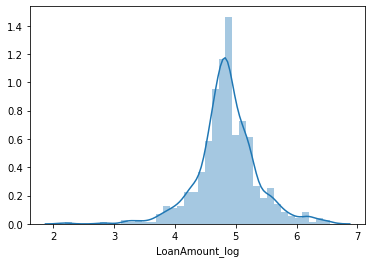

In [0]:
sns.distplot(data["LoanAmount_log"])

In [0]:
data["TotalIncome"]=data["ApplicantIncome"]+data["CoapplicantIncome"]

In [0]:
data[["TotalIncome"]].head()

,TotalIncome
0,5849.0
1,6091.0
2,3000.0
3,4941.0
4,6000.0


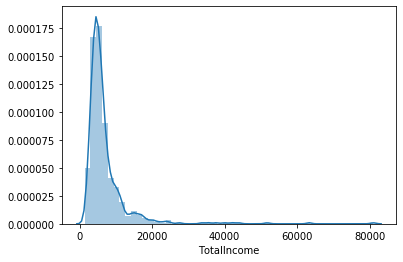

In [0]:
sns.distplot(data["TotalIncome"])

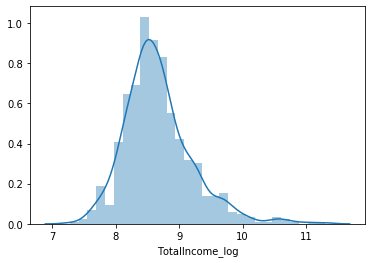

In [0]:
data["TotalIncome_log"]=np.log(data["TotalIncome"])
sns.distplot(data["TotalIncome_log"])

In [0]:
data["EMI"]=data["LoanAmount"]/data["Loan_Amount_Term"]

In [0]:
data[["EMI"]].head()

,EMI
0,0.355556
1,0.355556
2,0.183333
3,0.333333
4,0.391667


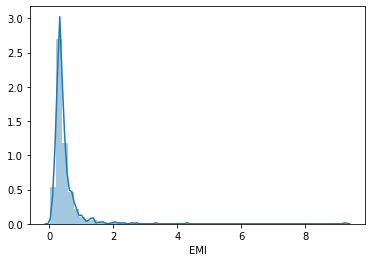

In [0]:
sns.distplot(data["EMI"])

In [0]:
data["Balance_Income"] = data["TotalIncome"]-data["EMI"]*1000 # To make the units equal we multiply with 1000

In [0]:
data[["Balance_Income"]].head()

,Balance_Income
0,5493.444444
1,5735.444444
2,2816.666667
3,4607.666667
4,5608.333333


In [0]:
data=data.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [0]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,1,4.852030,5849.0,8.674026,0.355556,5493.444444
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,6091.0,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,3000.0,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4.787492,4941.0,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,1,4.948760,6000.0,8.699515,0.391667,5608.333333


In [0]:
data=data.drop("Loan_ID",axis=1)

In [0]:
data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,1,4.852030,5849.0,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,6091.0,8.714568,0.355556,5735.444444
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,3000.0,8.006368,0.183333,2816.666667


In [0]:
X=data.drop("Loan_Status",1)

In [0]:
X.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,4.85203,5849.0,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,4.85203,6091.0,8.714568,0.355556,5735.444444


In [0]:
y=data[["Loan_Status"]]

In [0]:
y.head(2)

,Loan_Status
0,1
1,0


In [0]:
X = pd.get_dummies(X)

In [0]:
X.head(3)

,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4.852030,5849.0,8.674026,0.355556,5493.444444,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,1.0,4.852030,6091.0,8.714568,0.355556,5735.444444,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,1.0,4.189655,3000.0,8.006368,0.183333,2816.666667,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1


In [0]:
data=pd.get_dummies(data)

In [0]:
data.head(3)

,Credit_History,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1,4.852030,5849.0,8.674026,0.355556,5493.444444,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,1.0,0,4.852030,6091.0,8.714568,0.355556,5735.444444,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,1.0,1,4.189655,3000.0,8.006368,0.183333,2816.666667,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1


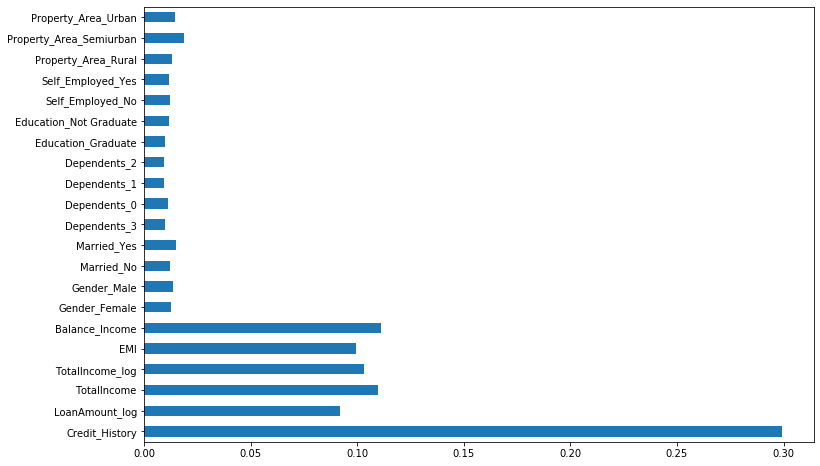

In [0]:
importances = pd.Series(forest_model.feature_importances_,index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

In [0]:
# Model evaluation using default parameters

# Creating a dict of the models
model_dict = {'Random Forest': RandomForestClassifier(random_state=3),
              'Decsision Tree': DecisionTreeClassifier(random_state=3),
              'AdaBoost': AdaBoostClassifier(random_state=3),
              'Gaussian Naive Bayes': GaussianNB(),
              'K Nearest Neighbor': KNeighborsClassifier(),
              'XGBoost': XGBClassifier(n_estimators=50,max_depth=4),
              'Logistic Regression': LogisticRegression(random_state=1)}

# Train test split with stratified sampling for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = .3, 
                                                    shuffle = True, 
                                                    random_state = 42)

# Function to get the scores for each model in a df
def model_score_df(model_dict):   
    model_name, ac_score_list, p_score_list, r_score_list, f1_score_list = [], [], [], [], []
    for k,v in model_dict.items():   
        model_name.append(k)
        v.fit(X_train, y_train)
        y_pred = v.predict(X_test)
        ac_score_list.append(accuracy_score(y_test, y_pred))
        p_score_list.append(precision_score(y_test, y_pred, average='macro'))
        r_score_list.append(recall_score(y_test, y_pred, average='macro'))
        f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
        model_comparison_df = pd.DataFrame([model_name, ac_score_list, p_score_list, r_score_list, f1_score_list]).T
        model_comparison_df.columns = ['model_name', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score']
        model_comparison_df = model_comparison_df.sort_values(by='f1_score', ascending=False)
    return model_comparison_df

model_score_df(model_dict)

,model_name,accuracy_score,precision_score,recall_score,f1_score
3,Gaussian Naive Bayes,0.789189,0.816462,0.717628,0.73444
5,XGBoost,0.789189,0.825282,0.714103,0.731075
0,Random Forest,0.778378,0.792248,0.709295,0.724192
2,AdaBoost,0.772973,0.780998,0.705128,0.71913
6,Logistic Regression,0.783784,0.843722,0.699359,0.71477
1,Decsision Tree,0.72973,0.702448,0.692949,0.696761
4,K Nearest Neighbor,0.589189,0.436121,0.471795,0.424337
